In [15]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.family"] = "Times"


In [16]:
STRATEGY = ["desktop", "mobile"][0]
CATEGORY = "seo"


In [17]:
JSON_FILE_NAME = f"data/{STRATEGY}_{CATEGORY}.json"
print(JSON_FILE_NAME)


data/desktop_seo.json


In [18]:
json_obj = None
with open(JSON_FILE_NAME, "r") as in_file:
    json_obj = json.load(in_file)


In [19]:
scores = []
best_score, worst_score = 0, 100
best_website, worst_website = None, None
sites = {}
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["seo"]["score"] * 100
        if acc_score > best_score:
            best_score = acc_score
            best_website = k
        
        if acc_score < worst_score:
            worst_score = acc_score
            worst_website = k
        scores.append(acc_score)
        sites[k] = acc_score
    except:
        print(k)

scores = np.array(scores)


Konya Büyükşehir Belediyesi
Manisa Büyükşehir Belediyesi
Van Büyükşehir Belediyesi


In [20]:
print(best_score, best_website)
print(worst_score, worst_website)

100 Malatya Büyükşehir Belediyesi
64.0 Adana Büyükşehir Belediyesi


In [21]:
i = 1
for k in sorted(sites, key=sites.get, reverse=True):
    print(i, k, sites[k])
    i += 1

1 Malatya Büyükşehir Belediyesi 100
2 Ankara Büyükşehir Belediyesi 92.0
3 Kocaeli Büyükşehir Belediyesi 92.0
4 Gaziantep Büyükşehir Belediyesi 91.0
5 Balıkesir Büyükşehir Belediyesi 82.0
6 Diyarbakır Büyükşehir Belediyesi 82.0
7 Erzurum Büyükşehir Belediyesi 82.0
8 Mersin Büyükşehir Belediyesi 82.0
9 İstanbul Büyükşehir Belediyesi 82.0
10 Kayseri Büyükşehir Belediyesi 82.0
11 Sakarya Büyükşehir Belediyesi 82.0
12 Samsun Büyükşehir Belediyesi 82.0
13 Hatay Büyükşehir Belediyesi 80.0
14 Mardin Büyükşehir Belediyesi 80.0
15 Tekirdağ Büyükşehir Belediyesi 80.0
16 Trabzon Büyükşehir Belediyesi 80.0
17 Şanlıurfa Büyükşehir Belediyesi 80.0
18 İzmir Büyükşehir Belediyesi 73.0
19 Kahramanmaraş Büyükşehir Belediyesi 73.0
20 Muğla Büyükşehir Belediyesi 73.0
21 Ordu Büyükşehir Belediyesi 73.0
22 Antalya Büyükşehir Belediyesi 70.0
23 Aydın Büyükşehir Belediyesi 70.0
24 Bursa Büyükşehir Belediyesi 70.0
25 Denizli Büyükşehir Belediyesi 70.0
26 Eskişehir Büyükşehir Belediyesi 70.0
27 Adana Büyükşehir 

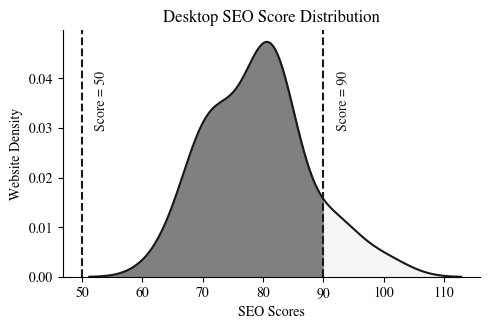

In [22]:
graph = sns.displot(scores, kind="kde", color="#181818", height=3, aspect=5/3)
graph.refline(x=90, color="#181818")
graph.refline(x=50, color="#181818")

graph.set(xlabel="SEO Scores",
          ylabel="Website Density",
          title="Desktop SEO Score Distribution")

axes = graph.axes.flatten()
axes[0].text(92, 0.03, "Score = 90", c="#181818", rotation=90)
axes[0].text(52, 0.03, "Score = 50", c="#181818", rotation=90)

kde_x = axes[0].lines[0].get_xdata()
kde_y = axes[0].lines[0].get_ydata()

axes[0].fill_between(kde_x, kde_y, where=(kde_x < 50), color="#484848")
axes[0].fill_between(kde_x, kde_y, where=(kde_x >= 50)
                     & (kde_x <= 90), color="#808080")
axes[0].fill_between(kde_x, kde_y, where=(kde_x > 90), color="#F5F5F5")

plt.savefig(f"results/{STRATEGY}_{CATEGORY}.pdf", bbox_inches="tight")
plt.show()


In [23]:
np.mean(scores)


79.14814814814815

In [24]:
print(np.max(scores), np.min(scores))


100.0 64.0


In [25]:
len(scores[np.where(scores >= 90)]) / len(scores) * 100


14.814814814814813

In [26]:
len(scores[np.where(scores <= 50)]) / len(scores) * 100

0.0

In [27]:
len(scores)


27

In [28]:
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["accessibility"]["score"] * 100
        if acc_score < 51:
            print(k)
    except:
        pass
